The Original Datasethere

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

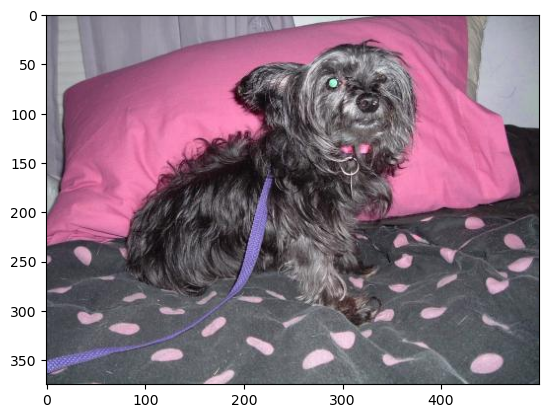

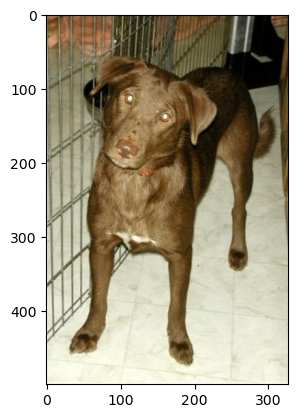

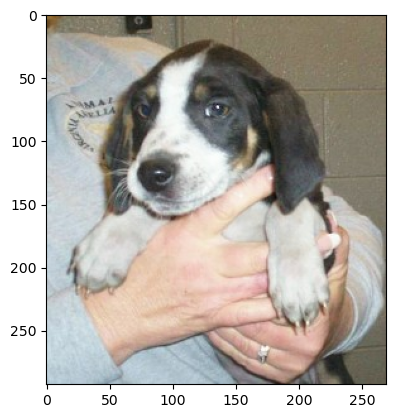

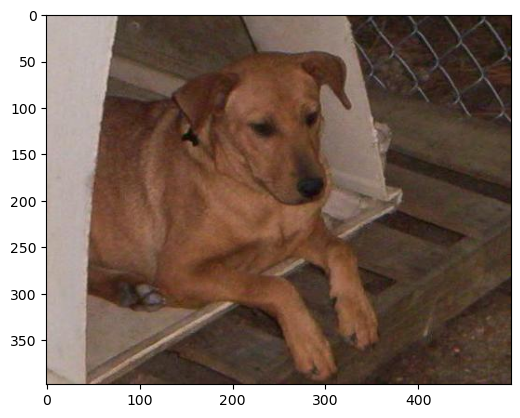

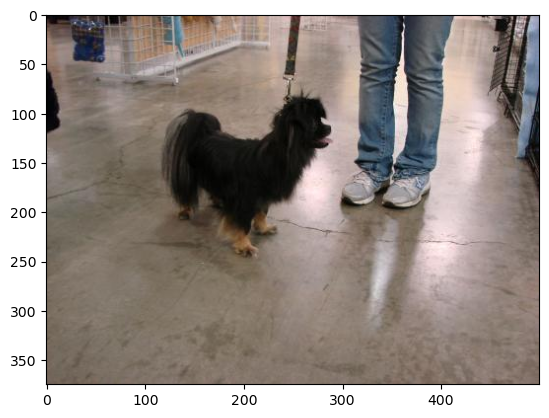

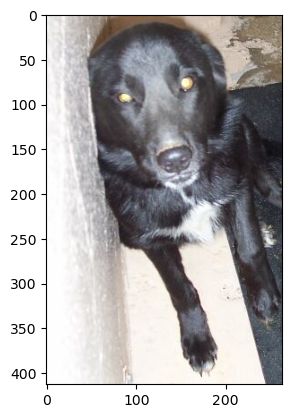

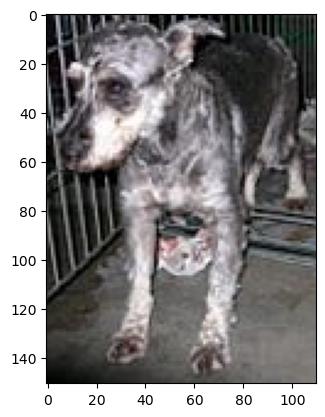

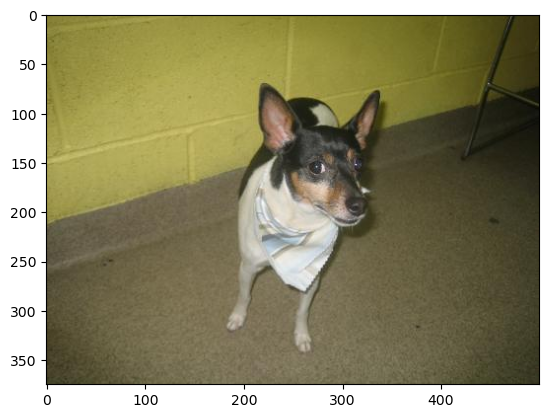

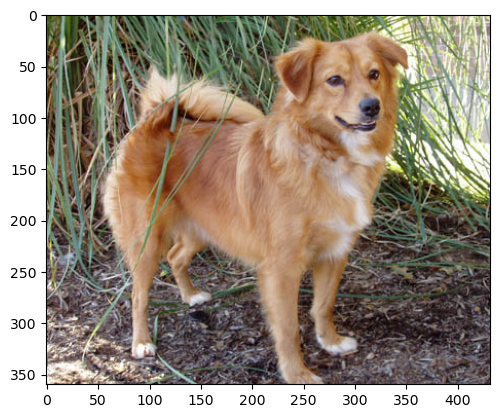

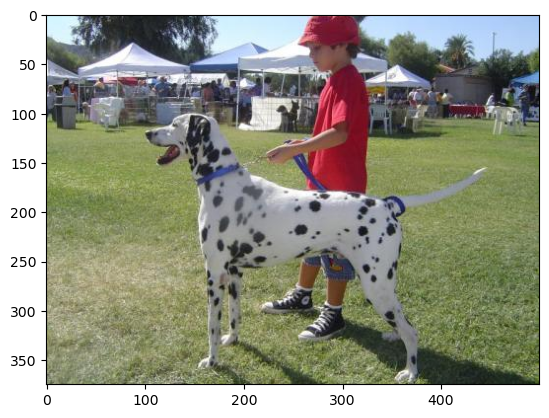

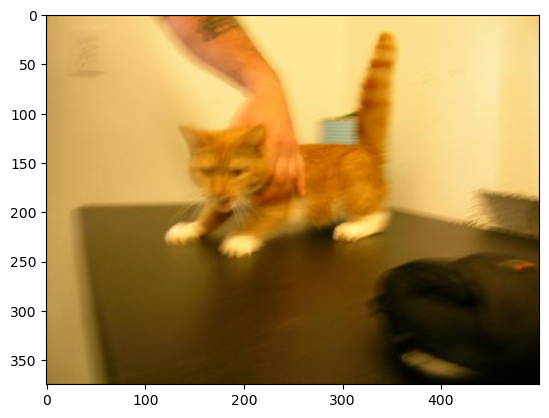

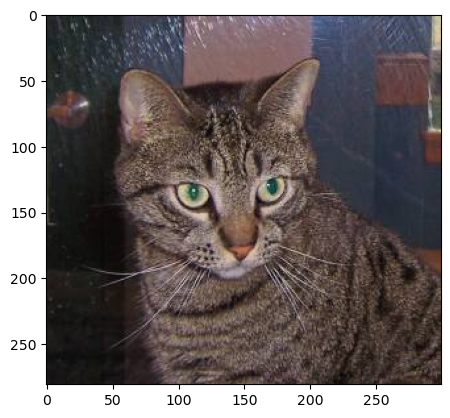

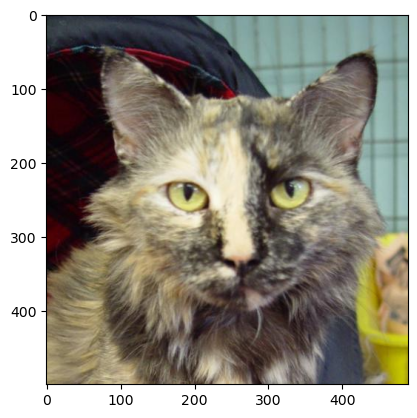

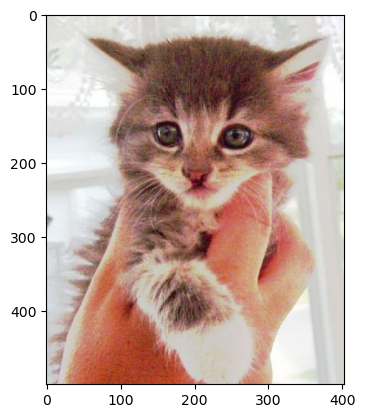

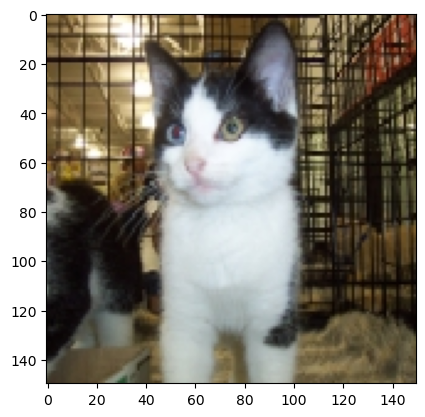

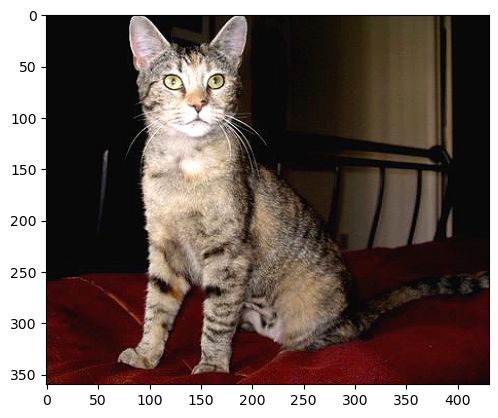

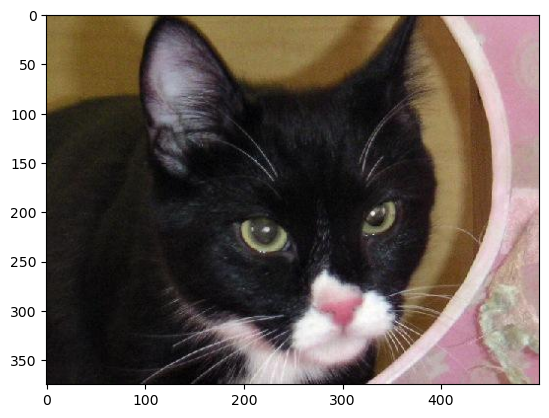

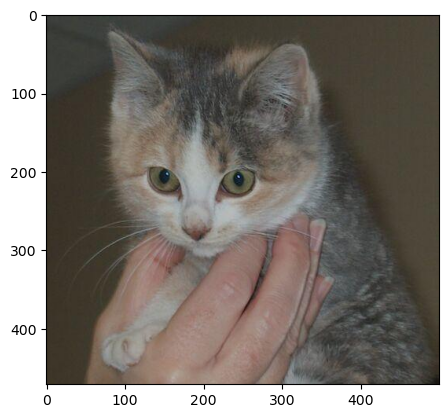

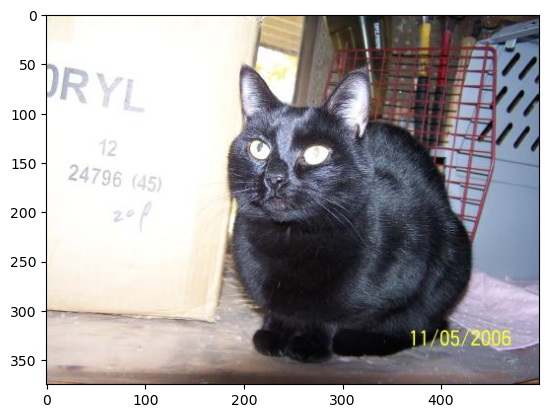

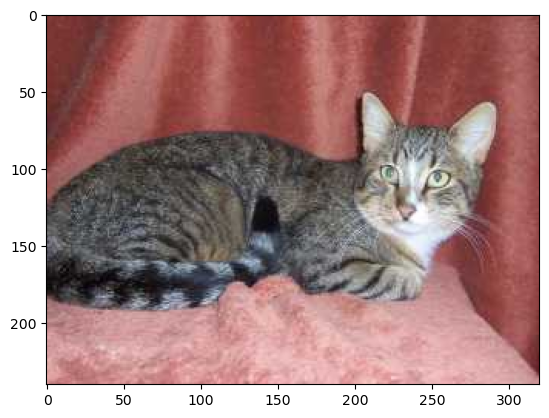

In [13]:
DATADIR = 'D:\kagglecatsanddogs_5340\PetImages'
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR, category)  # create path to dogs and cats
    x = 0
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        x += 1
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
        plt.imshow(img_array)  # graph it
        plt.show()  # display!
        if x == 10:
            break

In [16]:
print(img_array)
print(img_array.shape)

[[[123  55  52]
  [128  60  57]
  [132  64  61]
  ...
  [139  71  68]
  [134  66  63]
  [133  65  62]]

 [[123  55  52]
  [127  59  56]
  [131  63  60]
  ...
  [138  70  67]
  [137  69  66]
  [139  71  68]]

 [[123  55  52]
  [126  58  55]
  [130  62  59]
  ...
  [131  63  60]
  [135  67  64]
  [139  71  68]]

 ...

 [[223 162 161]
  [218 157 156]
  [215 151 151]
  ...
  [197 141 144]
  [199 143 146]
  [201 145 148]]

 [[224 160 160]
  [214 150 150]
  [203 139 139]
  ...
  [202 147 150]
  [203 147 150]
  [202 146 149]]

 [[225 161 161]
  [211 147 147]
  [194 130 130]
  ...
  [206 151 154]
  [204 148 151]
  [200 144 147]]]
(240, 320, 3)


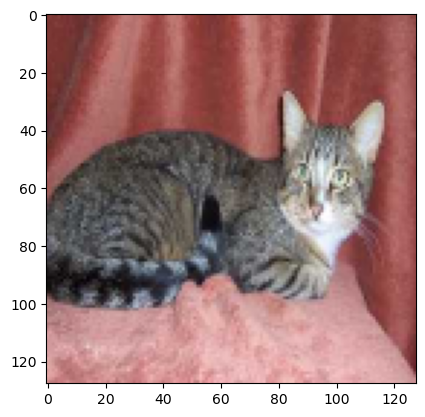

In [17]:
IMG_SIZE = 128
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR, category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array without specifying grayscale
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE),3)  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

100%|██████████| 12501/12501 [02:20<00:00, 89.13it/s] 


In [6]:
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
0
1
1
0
0
0


In [7]:
X = []
y = []

# Loop through training data
for features, label in training_data:
    X.append(features)
    y.append(label)

# Convert lists to numpy arrays
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # Adjust shape for RGB images
X = X / 255.0  # Normalize pixel values
y = np.array(y)

In [8]:
# Save X and y using pickle
with open("XRGB.pickle", "wb") as pickle_out:
    pickle.dump(X, pickle_out)

with open("yRGB.pickle", "wb") as pickle_out:
    pickle.dump(y, pickle_out)


In [4]:
# Load X and y from pickle files
with open("XRGB.pickle", "rb") as pickle_in:
    X = pickle.load(pickle_in)

with open("yRGB.pickle", "rb") as pickle_in:
    y = pickle.load(pickle_in)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2),
    keras.layers.Softmax()  # Softmax activation for classification
])


C:\Users\omdia\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
model.fit(X_train, y_train, epochs=20,batch_size=64,validation_data=(X_test, y_test))

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 55s 160ms/step - accuracy: 0.5294 - loss: 4.5124 - val_accuracy: 0.5042 - val_loss: 1.2296
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 43s 139ms/step - accuracy: 0.5636 - loss: 0.7935 - val_accuracy: 0.5403 - val_loss: 0.7535
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - accuracy: 0.5959 - loss: 0.6799 - val_accuracy: 0.6317 - val_loss: 0.6409
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.6153 - loss: 0.6616 - val_accuracy: 0.6064 - val_loss: 0.6610
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 173s 555ms/step - accuracy: 0.6042 - loss: 0.6722 - val_accuracy: 0.6251 - val_loss: 0.6460
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.6131 - loss: 0.6550 - val_accuracy: 0.5798 - val_loss: 0.7231
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 42s 136ms/step - accuracy: 0.6181 - loss: 0.6551 - val_accuracy: 0.6299 - val_loss: 0.6404
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 44s 140ms/step - accuracy: 0.6308 - loss: 

In [14]:
test_loss, test_acc = model.evaluate(X_test,y_test)
test_acc

156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.6100 - loss: 0.6570


0.616032063961029

In [15]:
model.save("cats_vs_dogs_model.keras")
#model = keras.models.load_model("cats_vs_dogs_model.keras")

156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


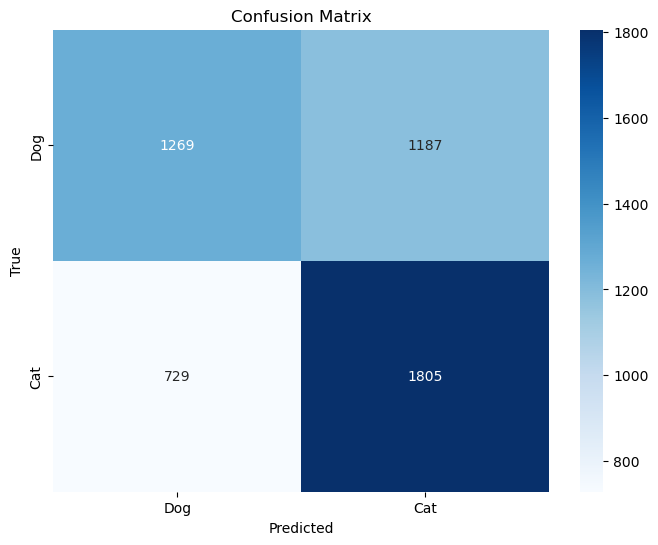

In [8]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()